In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import numpy as np
from EFBP import EFBPSim, minimize_squared_error

In [2]:
df = pd.read_csv("data/grid.csv")
df.head()

,strategies,memory,threshold,distribution,choice,crosses,std
0,2,2,6000.0,uniform,mse,False,366.371391
1,2,2,6000.0,uniform,mse,False,640.949987
2,2,2,6000.0,uniform,mse,False,0.707107
3,2,2,6000.0,uniform,mse,False,218.593365
4,2,2,6000.0,uniform,mse,False,625.267559


In [3]:
df.strategies.value_counts()

47     347
50     342
8      340
14     340
5      340
11     340
2      340
26     331
23     331
20     331
17     331
29     330
71     309
65     305
62     305
74     300
77     300
68     299
80     298
83     297
86     295
89     290
44     280
56     277
53     275
59     275
92     272
101    271
98     271
95     271
38     257
32     257
35     257
41     256
Name: strategies, dtype: int64

In [4]:
df.memory.value_counts()

2      343
5      340
8      315
11     311
86     311
14     311
17     309
23     306
38     306
29     306
32     306
35     306
20     306
26     306
41     305
53     304
50     304
44     304
47     304
56     302
59     298
65     297
68     297
62     297
71     295
74     294
98     293
77     287
95     287
80     286
83     284
89     281
92     281
101    278
Name: memory, dtype: int64

In [5]:
df.crosses.value_counts()

False    10120
True       140
Name: crosses, dtype: int64

Text(0, 0.5, 'Memory')

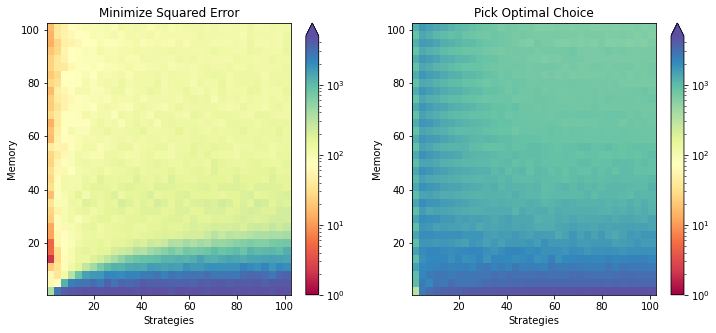

In [6]:
vmin = df["std"].max()
vmax = df["std"].max()
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(1,2,figsize=(12,5))

cf = "mse"

filtered = df[df.choice == cf]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((34,34))
Y = grpd.memory.values.reshape((34,34))
Z = grpd["std"].values.reshape((34,34))

cmap = cm.get_cmap('Spectral')

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax[0], extend='max')
ax[0].title.set_text("Minimize Squared Error")
ax[0].set_xlabel("Strategies")
ax[0].set_ylabel("Memory")

cf = "choice"
filtered = df[df.choice == cf]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((34,34))
Y = grpd.memory.values.reshape((34,34))
Z = grpd["std"].values.reshape((34,34))

cmap = cm.get_cmap('Spectral')

pcm = ax[1].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax[1], extend='max')
ax[1].title.set_text("Pick Optimal Choice")
ax[1].set_xlabel("Strategies")
ax[1].set_ylabel("Memory")

# What happens when we run the simulation with some "good" choices

In [14]:
grpd = df.groupby(["strategies", "memory", "choice"])["std"].mean().reset_index().sort_values("std")

In [15]:
grpd.head(10)

,strategies,memory,choice,std
9,2,14,mse,2.124340
13,2,20,mse,4.905277
11,2,17,mse,5.072409
15,2,23,mse,11.548816
17,2,26,mse,11.755713
43,2,65,mse,13.159021
63,2,95,mse,13.183813
65,2,98,mse,14.015328
39,2,59,mse,15.924887
51,2,77,mse,15.980940


In [16]:
grpd[grpd.choice=="choice"].head(10)

,strategies,memory,choice,std
0,2,2,choice,315.705916
2102,92,95,choice,607.233149
2238,98,95,choice,609.784480
1970,86,101,choice,617.007555
2242,98,101,choice,620.161263
2308,101,98,choice,622.189690
2172,95,98,choice,622.744094
1766,77,101,choice,627.016244
1898,83,95,choice,629.755969
2170,95,95,choice,630.977184


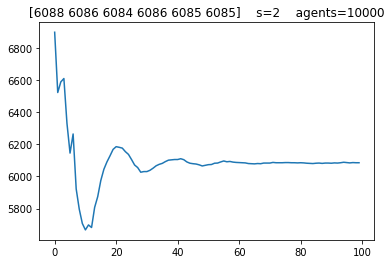

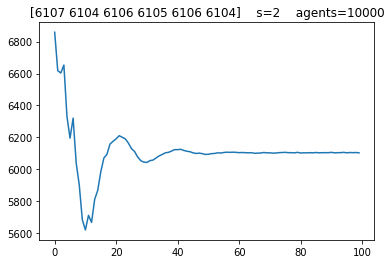

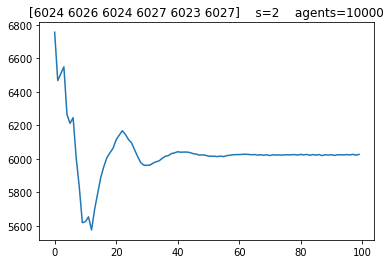

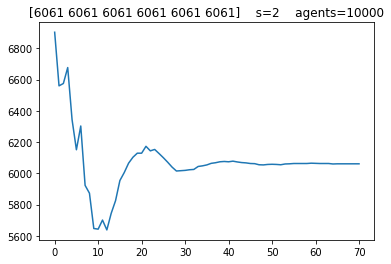

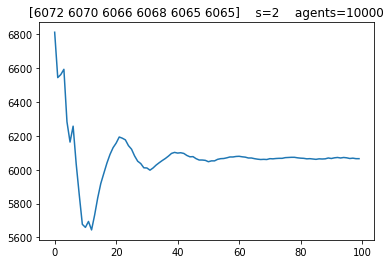

In [23]:
# why doesn't anything cross?
rng = np.random.default_rng(145)

agents = 10000
s = 2
memory = 14
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

What???? Come back to this

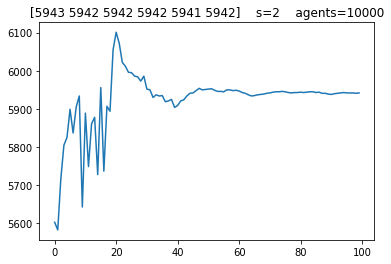

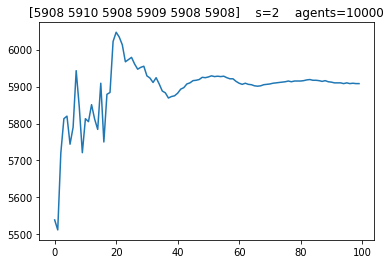

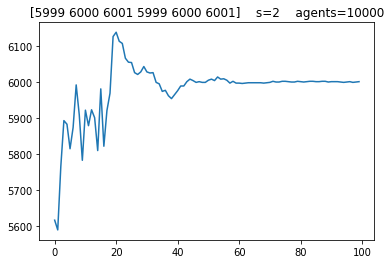

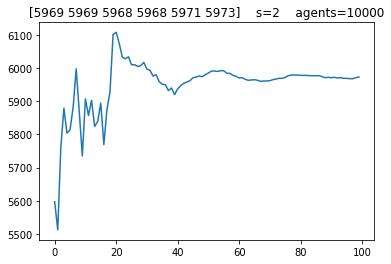

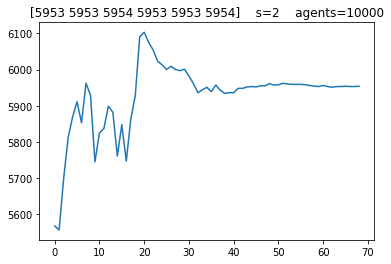

In [24]:
agents = 10000
s = 2
memory = 20
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

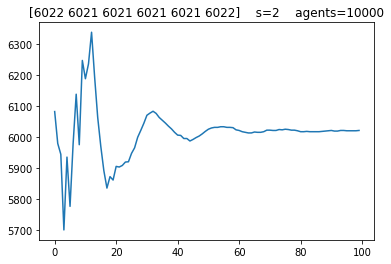

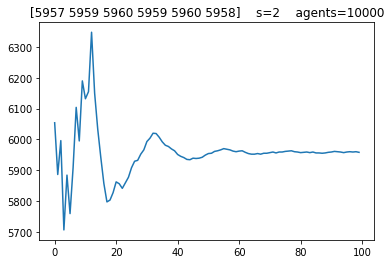

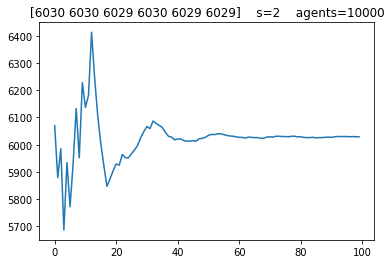

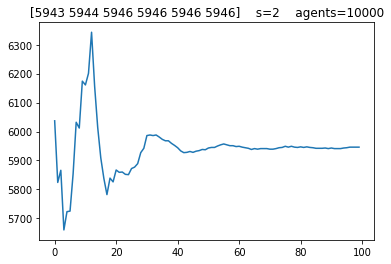

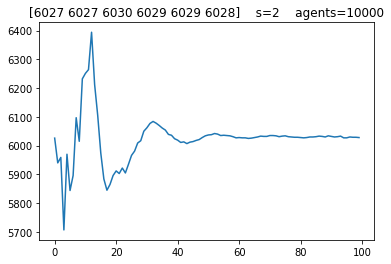

In [25]:
agents = 10000
s = 2
memory = 17
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")